# Experiment zum Einfluss von Blickrichtung und Geschlecht auf die Reaktionszeit und Genauigkeit

Papeo, Stein und Sito-Faraco (2017) haben in einer experimentellen Reaktionszeitstudie die Reaktionen auf Bilder von Menschen und Objekten, die entweder "zueinander schauen" bzw. einander zugewandt oder voneinander abgewandt sind. Damit soll der Effekt des "perceptional grouping" erreicht werden, bei dem Stimuli als einander zugehörig wahrgenommen werden. Es wurde gefunden, dass Versuchspersonen akkurater reagieren, wenn Menschen dargestellt werden, die einander zugewandt sind. Wurden die selben "gruppierten" Menschen invertiert bzw. vertikal gespiegelt dargestellt, trat dieser Effekt nicht auf.
In dieser kurzen Studie wurde versucht, die Befunde daraus mit Gesichtern von Menschen zu replizieren, im Gegensatz zu Ganzkörperdarstellung in der Studie von Papeo und Kollegen (2017). Desweiteren soll hier der Einfluss des Geschlechts der Probanden untersucht werden.

In diesem Experiment wurden den Probanden in jedem Trial zwei Bilder von weiblichen oder männlichen Gesichtern vorgelegt. Diese beiden Gesichtern konnten jeweils nach links oder rechts schauen. Damit konnten sich die beiden Gesichter entweder anschauen (linkes Bild schaut nach rechts, rechtes Bild schaut nach links) oder nicht anschauen (andere Möglichkeiten). Der Faktor "Kongruenz Blickrichtung" kann die Ausprägung "congruent" (Gesichter blicken sich an) oder incongruent (Gesichtern blicken sich nicht an) haben.
Das Geschlecht der beiden Bilder auf dem Bildschirm kann entweder mit dem Geschlecht des Probanden übereinstimmen oder davon abweichen. Damit ist der Faktor "Geschlechtskongruenz" entweder "congruent" oder "incongruent".

Die Probanden sollen durch Tastendruck angeben, ob auf dem Bildschirm zwei Frauen oder zwei Männer zu sehen sind. 
Es wird vermutet, dass die Entscheidung schneller und treffsicherer ist, wenn sich die beiden Gesichter auf dem Bildschirm ansehen (Hypothese 1 und 2). Weiterhin wird vermutet, dass bei übereinstimmendem Geschlecht zwischen Proband und Stimulus die Reaktionszeit geringer und die Genauigkeit größer ist (Hypothesen 3 und 4). 
Des weiteren wird explorativ untersucht, ob es Interaktionseffekte zwischen den Faktoren Blickrichtung und Geschlechtskongruenz hinsichtlich der Reaktionszeit und Genauigkeit gibt (Hypothesen 5 und 6). 

Hypothesen: 
1. Wenn sich beide Gesichter ansehen (congruency), dann ist die Reaktionszeit kürzer. 
2. Wenn sich beide Gesichter ansehen (congruency), dann ist die Genauigkeit größer.
3. Wenn Geschlecht der Versuchsperson mit Stimulusgeschlecht übereinstimmt, dann ist die Reaktionszeit kürzer. 
4. Wenn Geschlecht der Versuchsperson mit Stimulusgeschlecht übereinstimmt, dann ist die Accuracy größer.
5. Interaktionseffekt: Bei gleichem Geschlecht wirkt sich die Blickrichtung zueinander stärker positiv auf die RT aus.
6. Interaktionseffekt: Bei gleichem Geschlecht wirkt sich die Blickrichtung zueinander stärker positiv auf die Accuracy aus.

In [1]:
%matplotlib inline
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind, f_oneway
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/jona/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Daten einlesen
from glob import glob
all_dfs = list()
for ii, file in enumerate (glob("./csv/*")):
    if file.endswith(".csv"):
        try:
            df = pd.read_csv(file)
            df = df.query("100 < response_time < 2000")
            all_dfs.append(df)
        except Exception:
            pass
df = pd.concat(all_dfs) 

df.head()

,acc,accuracy,average_response_time,avg_rt,background,bidi,blickr_congruency,blickr_eins,blickr_zwei,canvas_backend,...,time_reset_feedback,time_target,time_trial_sequence,time_welcome,title,total_correct,total_response_time,total_responses,uniform_coordinates,width
1,undefined,undefined,undefined,undefined,white,no,0,rechts,rechts,psycho,...,NaN,NaN,314552.237034,NaN,Tutorial: Gaze cuing,0,0,0,yes,1024
2,undefined,undefined,undefined,undefined,white,no,0,links,links,psycho,...,NaN,NaN,316051.891088,NaN,Tutorial: Gaze cuing,0,0,0,yes,1024
3,undefined,undefined,undefined,undefined,white,no,0,rechts,rechts,psycho,...,NaN,NaN,317377.511024,NaN,Tutorial: Gaze cuing,0,0,0,yes,1024
4,undefined,undefined,undefined,undefined,white,no,0,links,rechts,psycho,...,NaN,NaN,318726.087093,NaN,Tutorial: Gaze cuing,0,0,0,yes,1024
5,undefined,undefined,undefined,undefined,white,no,0,links,rechts,psycho,...,NaN,NaN,320010.717154,NaN,Tutorial: Gaze cuing,0,0,0,yes,1024


In [3]:
#Nur benötigte Variablen behalten
col_list = ["blickr_congruency", "blickr_eins", "blickr_zwei", "correct_response", "count_trial_sequence", "response", "response_time", "sex", "subject_nr", "gender_subj"]
df = df[col_list]
df.head()

,blickr_congruency,blickr_eins,blickr_zwei,correct_response,count_trial_sequence,response,response_time,sex,subject_nr,gender_subj
1,0,rechts,rechts,z,1,z,496.284008,Frau,5,Male
2,0,links,links,m,2,m,326.757908,Mann,5,Male
3,0,rechts,rechts,m,3,m,367.558956,Mann,5,Male
4,0,links,rechts,m,4,m,294.186115,Mann,5,Male
5,0,links,rechts,m,5,m,303.235054,Mann,5,Male


In [4]:
#Variable "accuracy" hinzufügen
is_corr = df["correct_response"] == df["response"] 
df["accuracy"] = is_corr
df.head()

,blickr_congruency,blickr_eins,blickr_zwei,correct_response,count_trial_sequence,response,response_time,sex,subject_nr,gender_subj,accuracy
1,0,rechts,rechts,z,1,z,496.284008,Frau,5,Male,True
2,0,links,links,m,2,m,326.757908,Mann,5,Male,True
3,0,rechts,rechts,m,3,m,367.558956,Mann,5,Male,True
4,0,links,rechts,m,4,m,294.186115,Mann,5,Male,True
5,0,links,rechts,m,5,m,303.235054,Mann,5,Male,True


In [5]:
#Umcodieren, sodass Benennung einheitlich ist 
df = df.replace("Frau", "Female")
df = df.replace("Mann", "Male")
df.head()

,blickr_congruency,blickr_eins,blickr_zwei,correct_response,count_trial_sequence,response,response_time,sex,subject_nr,gender_subj,accuracy
1,0,rechts,rechts,z,1,z,496.284008,Female,5,Male,True
2,0,links,links,m,2,m,326.757908,Male,5,Male,True
3,0,rechts,rechts,m,3,m,367.558956,Male,5,Male,True
4,0,links,rechts,m,4,m,294.186115,Male,5,Male,True
5,0,links,rechts,m,5,m,303.235054,Male,5,Male,True


In [6]:
#Variable gender_congr hinzufügen
gender_congr = df["sex"] == df["gender_subj"] 
df["gender_congr"] = gender_congr 
df.head()

,blickr_congruency,blickr_eins,blickr_zwei,correct_response,count_trial_sequence,response,response_time,sex,subject_nr,gender_subj,accuracy,gender_congr
1,0,rechts,rechts,z,1,z,496.284008,Female,5,Male,True,False
2,0,links,links,m,2,m,326.757908,Male,5,Male,True,True
3,0,rechts,rechts,m,3,m,367.558956,Male,5,Male,True,True
4,0,links,rechts,m,4,m,294.186115,Male,5,Male,True,True
5,0,links,rechts,m,5,m,303.235054,Male,5,Male,True,True


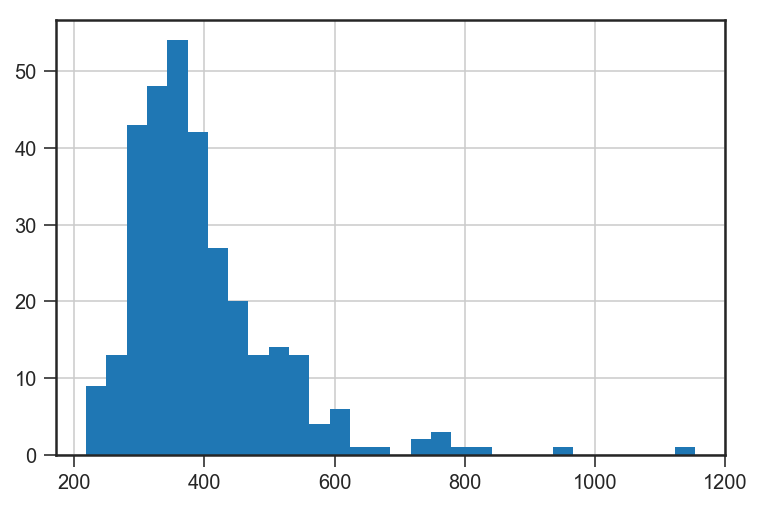

In [7]:
#Response Time Histogramm
df["response_time"].hist(bins = 30)

In [8]:
#Aggregation über die Trials der selben Bedingungen jedes Subjects, neues Dataset
df_by_subj = df.groupby(("subject_nr", "blickr_congruency", "gender_congr"))["response_time", "accuracy"].mean().reset_index()
df_by_subj

,subject_nr,blickr_congruency,gender_congr,response_time,accuracy
0,0,0,False,390.689075,0.916667
1,0,0,True,371.019204,0.958333
2,0,1,False,460.123062,1.000000
3,0,1,True,401.772648,0.875000
4,1,0,False,385.015339,0.958333
5,1,0,True,390.771544,0.913043
6,1,1,False,347.594917,0.750000
7,1,1,True,437.346578,0.875000
8,2,0,False,339.451989,0.958333
9,2,0,True,347.910772,0.833333


# Deskriptive Statistiken

In [9]:
df_by_subj.describe()

,subject_nr,blickr_congruency,response_time,accuracy
count,20.000000,20.000000,20.000000,20.000000
mean,2.400000,0.500000,402.841953,0.926812
std,1.902906,0.512989,63.026616,0.066045
min,0.000000,0.000000,307.022363,0.750000
25%,1.000000,0.000000,364.550307,0.875000
50%,2.000000,0.500000,388.845682,0.936594
75%,4.000000,1.000000,439.811754,0.968750
max,5.000000,1.000000,567.926884,1.000000


In [10]:
rt_cond = df.groupby(["gender_congr"])["response_time", "accuracy"]
rt_cond.mean()

,response_time,accuracy
gender_congr,,
False,394.665511,0.937500
True,397.846003,0.917197


In [11]:
rt_cond = df.groupby(["blickr_congruency"])["response_time", "accuracy"]
rt_cond.mean()

,response_time,accuracy
blickr_congruency,,
0,389.618631,0.928571
1,416.190760,0.924051


In [12]:
rt_cond = df.groupby(["blickr_congruency", "gender_congr"])["response_time", "accuracy"]
rt_cond.mean()

response_time  accuracy
blickr_congruency gender_congr                         
0                 False            391.700031  0.941667
                  True             387.501953  0.915254
1                 False            403.561950  0.925000
                  True             429.143386  0.923077

Graphische Darstellung der Mittelwerte in den 4 Bedingungen. Es erfolgt eine Einschränkung des Wertebereichs auf der y-Achse, um Unterschiede deutlicher zu machen. 

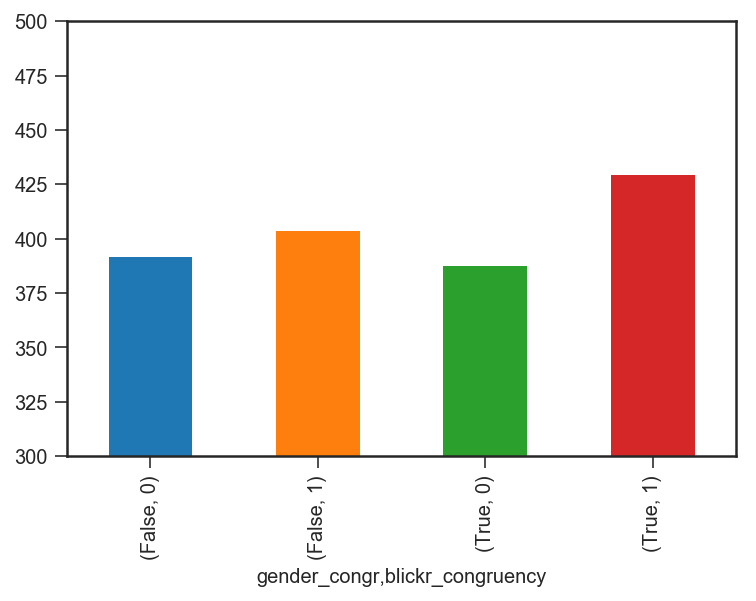

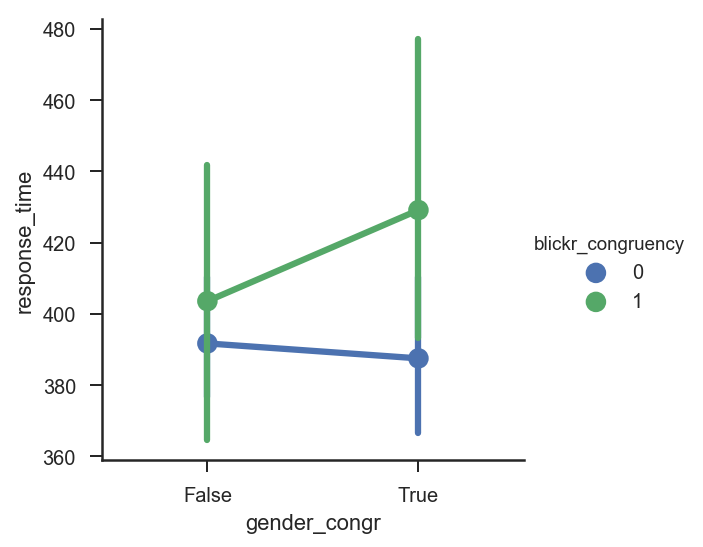

In [13]:
rt_cond = df.groupby(["gender_congr", "blickr_congruency"])["response_time"]
rt_cond.mean().plot(kind="bar", ylim = [300,500])

import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="gender_congr", y="response_time", hue = "blickr_congruency", data=df)

Hier zeigt sich eine augenscheinliche Tendenz zu einer geringeren Reaktionszeit, wenn keine Kongruenz in der Blickrichtung vorliegt (nicht hypothesenkonform). Es wird keine Tendenz hinsichtlich der Geschlechtskongrenz deutlich (True bedeutet, dass das Geschlecht der Versuchsperson und des Stimulus übereinstimmen). 
Möglich erscheint hier ein Interaktionseffekt, dahingehend, dass bei Übereinstimmung des Geschlechts die Kongruenz der Blickrichtung mit einer langsameren Reaktion zusammenhängt. Dies sind jedoch keine inferenzstatistischen Aussagen darüber, ob Unterschiede vorliegen, sondern nur eine augenscheinliche Beschreibung der Richtung der Mittelwertsunterschiede.  

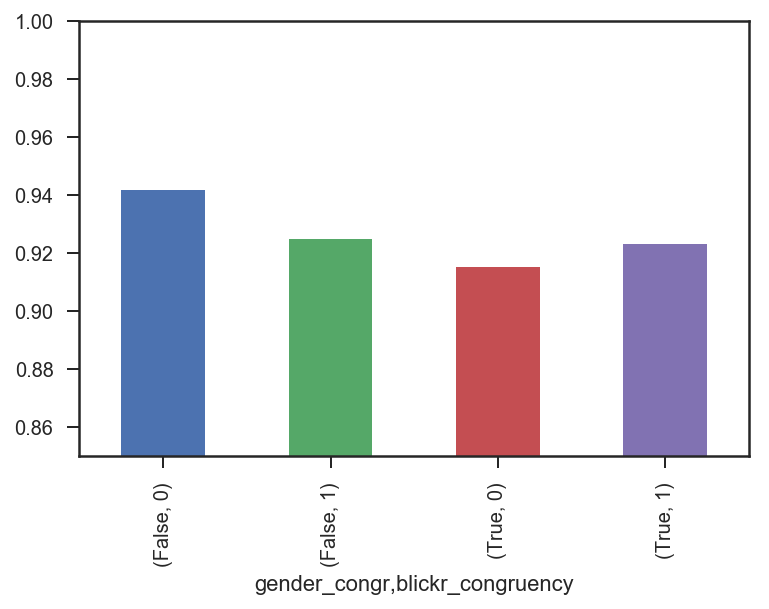

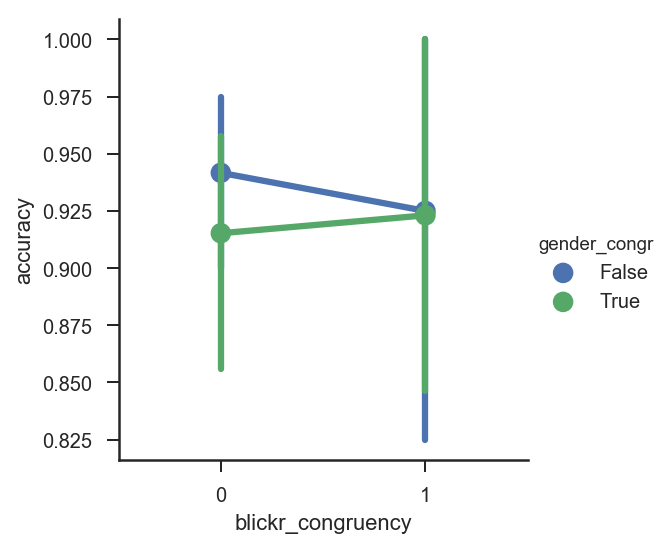

In [14]:
rt_cond = df.groupby(["gender_congr", "blickr_congruency"])["accuracy"]
rt_cond.mean().plot(kind="bar", ylim = [0.85,1])

import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="accuracy", hue = "gender_congr", data=df)

Hier erscheint die Genauigkeit der Antwort am größten, wenn es keine Geschlechtskongruenz gibt und die Stimuli sich nicht anschauen. Der Zusammenhang von größerer Genauigkeit bei inkongruentem Geschlecht liegt nur auf der Stufe "inkongruente Blickrichtung" vor (Interaktion). Dies weist ebenfalls nicht in die vermutete Richtung. Generell scheint die Genauigkeit geringer bei vorliegender Geschlechtskongruenz. Auch hier ist dies nur als eine beschreibende Darstellung gedacht und nicht als eine Aussage darüber, ob die beschriebenen Tendenzen tatsächlich vorliegen. 

Da hier hierarchische Daten vorliegen, muss der Faktor der einzelnen Versuchsperson berücksichtigt werden. 

Vergleich der 4 Bedingungen pro Subjekt:

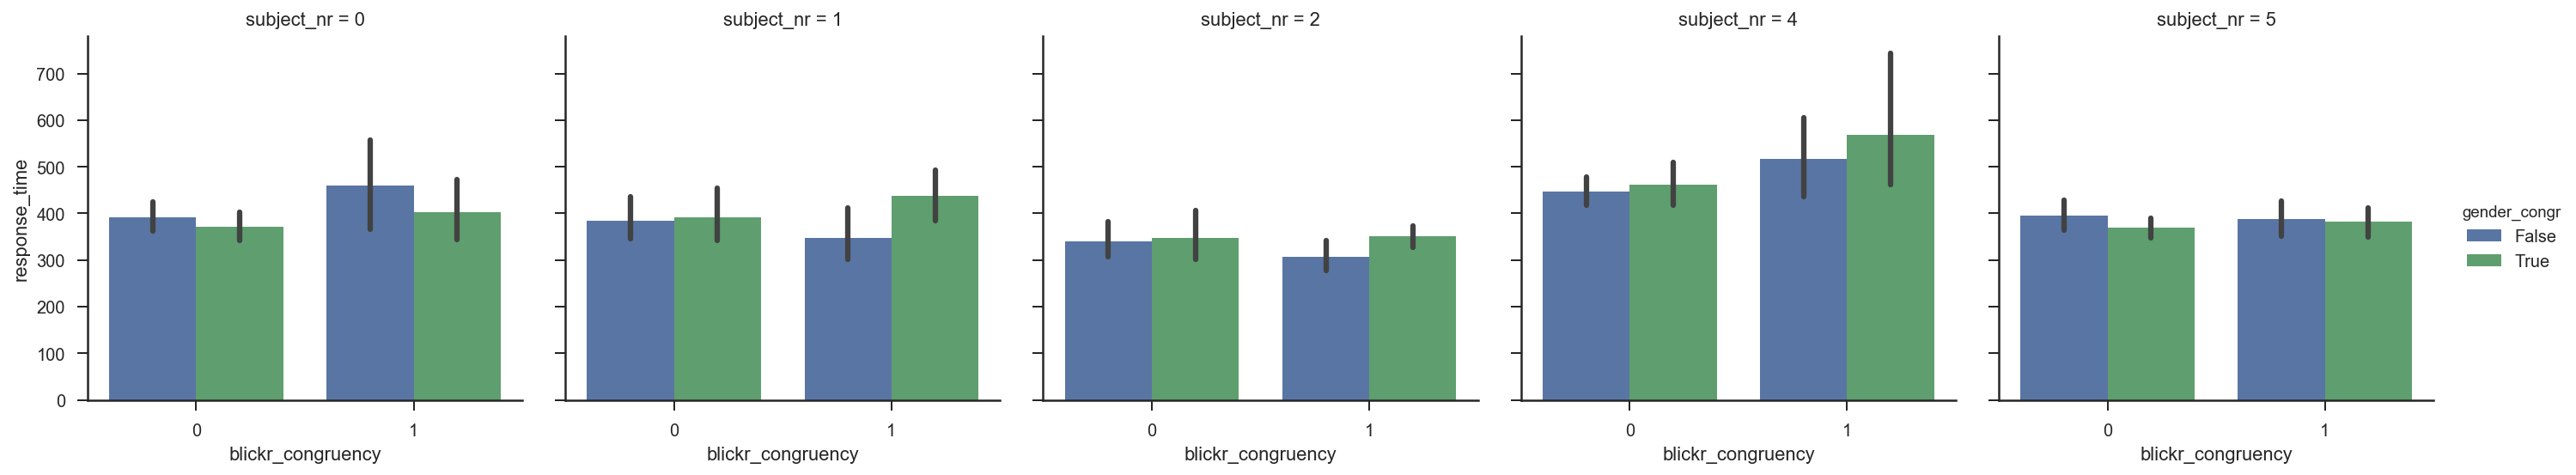

In [15]:
import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="response_time", hue="gender_congr", col = "subject_nr", data=df, kind = "bar")

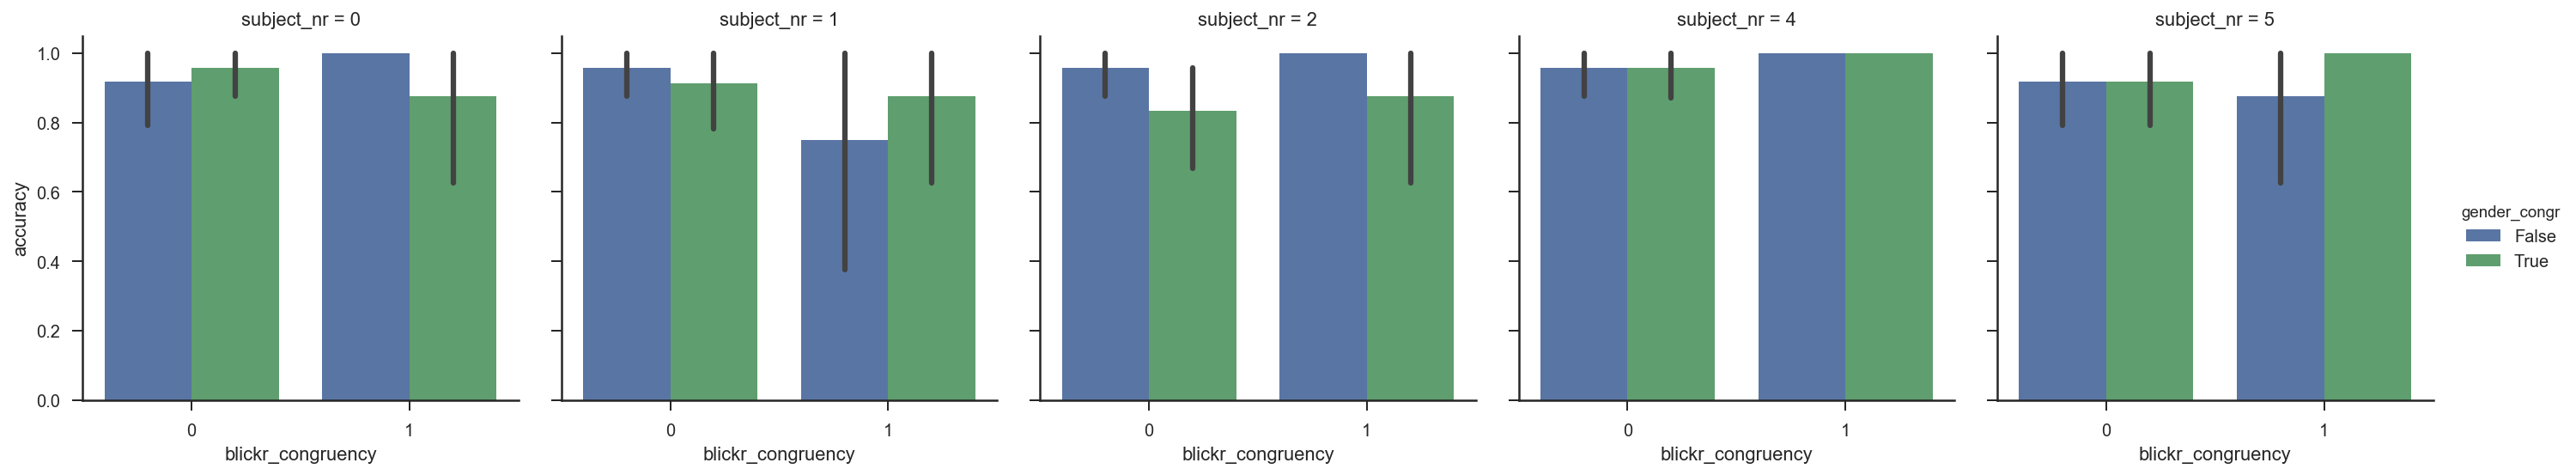

In [16]:
import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="accuracy", hue="gender_congr", col = "subject_nr", data=df, kind = "bar")

# Histogramme Reaktionszeit und Accuracy

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18f12828>,
      dtype=object)

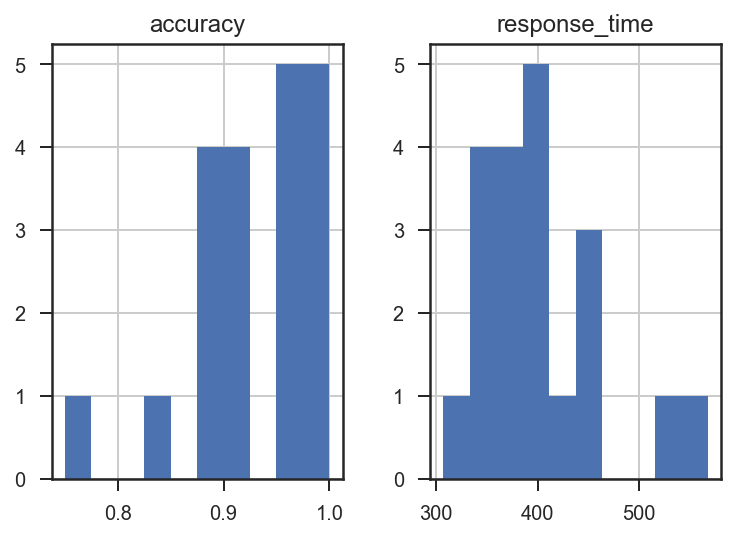

In [17]:
df_by_subj[["response_time", "accuracy"]].hist()

# Vergleich der vier Bedingungen hinsichtlich der Reaktionszeit

Hier wird ein Modell gerechnet, dass die beiden Faktoren Geschlechtskongruenz und Kongruenz der Blickrichtung als Prädiktoren einbezieht und die Reaktionszeit als abhängige Variable. Die Versuchsperson wird als Gruppierungsvariable miteinbezogen, da diese auch einen Anteil der Varianz erklärt. 

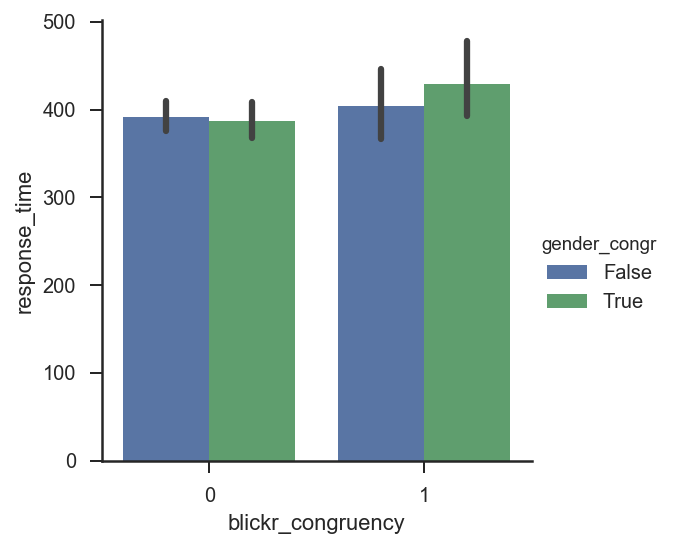

In [18]:
#Mittelwerte für Response Time der 4 Bedingungen 
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="response_time", hue="gender_congr", data=df, kind = "bar")

In [19]:
#Test der 4 Bedingungen bzgl. Reaktionszeit (Hypothese 1, 3 und 5)
import statsmodels.formula.api as smf
import numpy as np  

formula = "np.log(response_time) ~ blickr_congruency * gender_congr"
mdl = smf.mixedlm(formula, data=df, groups="subject_nr")
res = mdl.fit()
res.summary()

#1. Wenn Geschlecht der Versuchsperson mit Stimulusgeschlecht übereinstimmt, dann ist die Reaktionszeit kürzer. 
#3. Wenn sich Stimuli ansehen (congruecy), dann ist die Reaktionszeit kürzer. 
#5. Interaktionseffekt: Bei gleichem Geschlecht wirkt sich die Blickrichtung zueinander stärker positiv auf die RT aus.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:                 MixedLM      Dependent Variable:      np.log(response_time)
No. Observations:      317          Method:                  REML                 
No. Groups:            5            Scale:                   0.0515               
Min. group size:       63           Likelihood:              5.6745               
Max. group size:       64           Converged:               Yes                  
Mean group size:       63.4                                                       
----------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                               5.943    0.057 103.996 0.000  5.831  6.055
gender_congr[T.True]                   -0.017    0.029  -0.582 0.561 -0.075  0.041
blickr_congruency                       0.016    0.041   0.385 0.700 -0.065  0.097
blickr_congruency:gender_congr[T.True]  0.084    0.059   1.425 0.154 -0.032  0.200
groups RE                               0.014    0.047                            
==================================================================================

"""

Es besteht kein Haupteffekt für die Kongruenz der Blickrichtung (.700) und kein Haupteffekt für die Geschlechtskongruenz (.561). Desweiteren kann hier kein Interaktionseffekt gefunden werden (p = .154). Somit wird hier kein Unterschied in der Reaktionszeit gefunden, in Abhängigkeit davon, ob sich die Stimuli anschauen oder nicht anschauen. 

Hier wird zusätzlich ein alternatives Modell verwendet, um die Unterschiede zwischen den Faktoren darzustellen. 

In [20]:
import statsmodels.api as smf

formula = "np.log(response_time) ~ blickr_congruency * gender_congr"
mdl = smf.GEE.from_formula(formula, data=df, groups="subject_nr")

re = mdl.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                               
====================================================================================
Dep. Variable:        np.log(response_time)   No. Observations:                  317
Model:                                  GEE   No. clusters:                        5
Method:                         Generalized   Min. cluster size:                  63
                       Estimating Equations   Max. cluster size:                  64
Family:                            Gaussian   Mean cluster size:                63.4
Dependence structure:          Independence   Num. iterations:                     2
Date:                      Tue, 20 Mar 2018   Scale:                           0.063
Covariance type:                     robust   Time:                         18:16:38
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  5.9425      0.042    142.402      0.000       5.861       6.024
gender_congr[T.True]                      -0.0185      0.014     -1.313      0.189      -0.046       0.009
blickr_congruency                          0.0160      0.044      0.360      0.719      -0.071       0.103
blickr_congruency:gender_congr[T.True]     0.0857      0.044      1.962      0.050    9.79e-05       0.171
==============================================================================
Skew:                          0.8650   Kurtosis:                       1.3249
Centered skew:                 1.2109   Centered kurtosis:              2.7668
==============================================================================
"""

Mit dieser Modellierung wird der Befund bestätigt, dass kein Haupteffekt für die beiden Faktoren vorliegt (Geschlechtskongruenz p = .19; Kongruenz der Blickrichtung p = .72). Es wird kein Interaktionseffekt gefunden, das Ergebnis kann jedoch als Tendenz (p = .05 (< .1)) betrachtet werden. Das Konfidenzinzervall schließt 0 nicht mit ein. Somit liegt hier zumindest ein Hinweis auf einen Interaktionseffekt vor. Damit wäre die Reaktionszeit bei einer vorliegenden Geschlechtskongruenz länger, wenn die Blickrichtung ebenfalls kongruent ist.  Die Kongruenz der Blickrichtung würde sich also auf der Stufe des inkongruenten Geschlechts negativ auf die Reaktionszeit auswirken. 

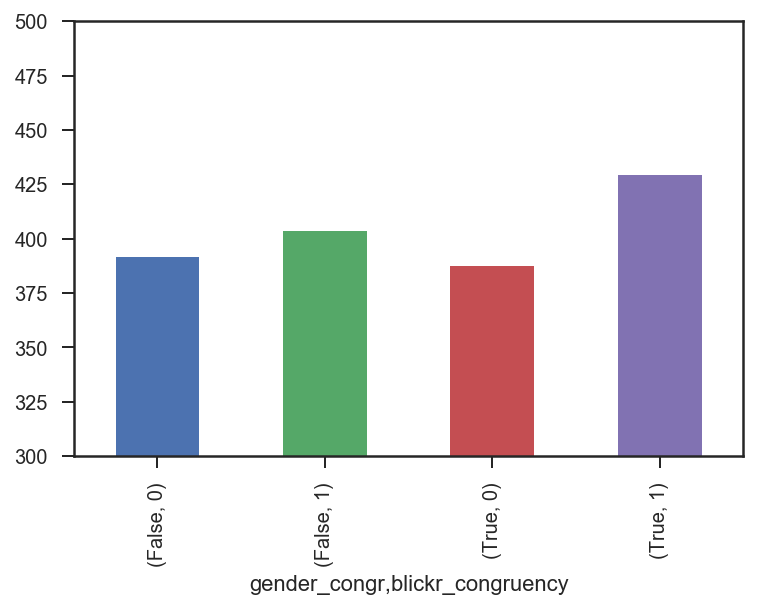

In [21]:
rt_cond = df.groupby(["gender_congr", "blickr_congruency"])["response_time"]
rt_cond.mean().plot(kind="bar", ylim = [300,500])

# Vergleich der vier Bedingungen hinsichtlich der Genauigkeit

Hier wird ein Modell gerechnet, dass die beiden Faktoren Geschlechtskongruenz und Kongruenz der Blickrichtung als Prädiktoren einbezieht und die Genauigkeit als abhängige Variable. Die Versuchsperson wird als Gruppierungsvariable miteinbezogen, da diese auch einen Anteil der Varianz erklärt. 

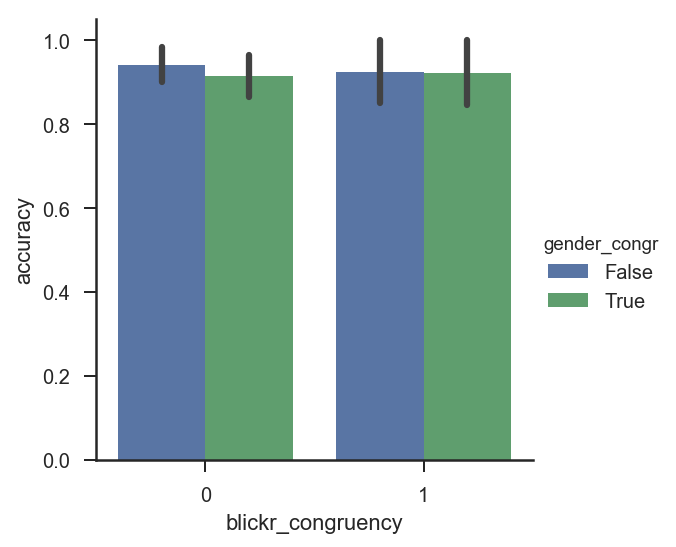

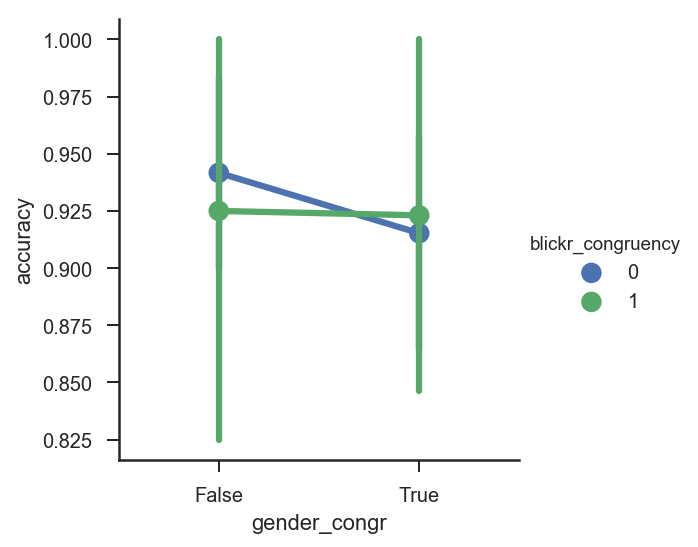

In [22]:
#Mittelwerte für Accuracy der 4 Bedingungen
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="accuracy", hue="gender_congr", data=df, kind = "bar")

import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="gender_congr", y="accuracy", hue = "blickr_congruency", data=df)

In [23]:
import statsmodels.api as sm

df["genderXblickr"] = df["gender_congr"] * df["blickr_congruency"]
mod = sm.NominalGEE(df["accuracy"], df[["gender_congr", "blickr_congruency", "genderXblickr"]],
                     groups=df["subject_nr"])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           NominalGEE Regression Results                           
===================================================================================
Dep. Variable:                    accuracy   No. Observations:                  317
Model:                          NominalGEE   No. clusters:                        5
Method:                        Generalized   Min. cluster size:                  63
                      Estimating Equations   Max. cluster size:                  64
Family:                       _Multinomial   Mean cluster size:                63.4
Dependence structure:  NominalIndependence   Num. iterations:                     2
Date:                     Tue, 20 Mar 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         18:16:45
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
gender_congr[0.0]         -2.3795      0.264     -9.013      0.000      -2.897      -1.862
blickr_congruency[0.0]    -2.5123      0.645     -3.897      0.000      -3.776      -1.249
genderXblickr[0.0]         2.4069      0.706      3.410      0.001       1.023       3.790
==============================================================================
Skew:                          1.5362   Kurtosis:                       3.1761
Centered skew:                 1.4946   Centered kurtosis:              3.0346
==============================================================================
"""

Hier werden ein signifikanter Haupteffekt der Geschlechtskongruenz, ein signifikanter Haupteffekt für die Kongruenz der Blickrichtung und ein signifikanter Interaktionseffekt gefunden. Die Genauigkeit ist geringer, wenn Geschlechtskongruenz vorliegt (p < .001), sowie geringer, wenn eine Kongruenz der Blickrichtung vorliegt (p < 001).
Der Interaktionseffekt (p = .001) besagt, dass sich bei bestehender Geschlechtskongruenz (True), die kongruente Blickrichtung positiv auf die Genauigkeit auswirkt, und bei abweichendem Geschlecht der gegenteilige Zusammenhang besteht. 

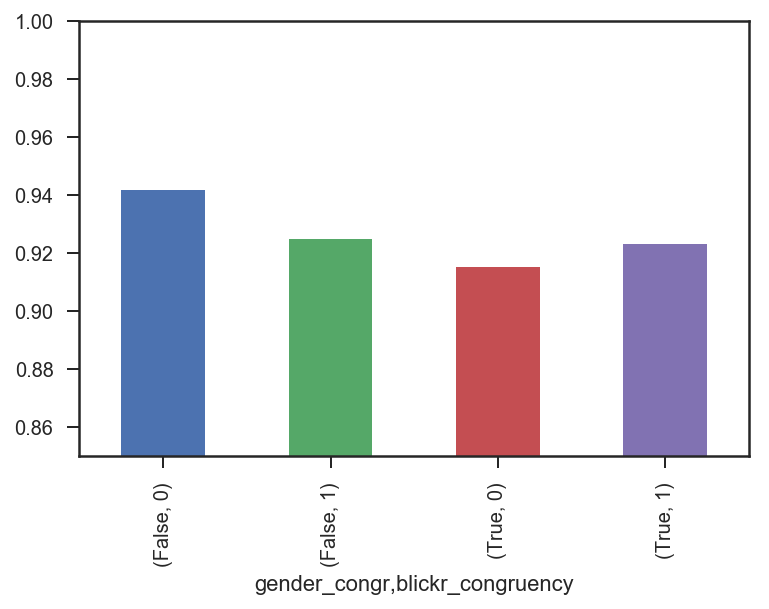

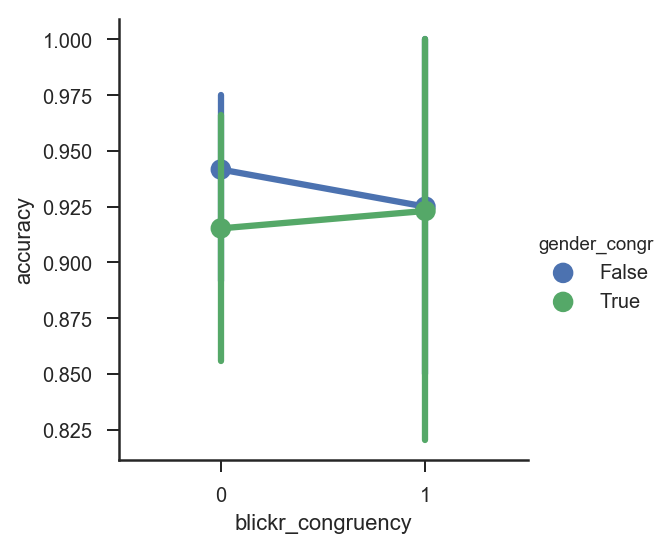

In [24]:
rt_cond = df.groupby(["gender_congr", "blickr_congruency"])["accuracy"]
rt_cond.mean().plot(kind="bar", ylim = [0.85,1])

import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="accuracy", hue = "gender_congr", data=df)

# Diskussion

Der Effekt aus der Studie von Papeo und Kollegen (2017) konnte in dieser experimentellen Studie nicht repliziert werden. Im Gegenteil zeigte sich hier eine schlechtere Genauigkeit, wenn die Stimuli zueinander blickten (kongruente Blickrichtung) und wenn das Geschlecht kongruent war. Der beabsichtigte "perceptual grouping"-Effekt konnte hiermit nicht repliziert werden. 

Möglicherweise wurden die Gesichter in den Bildern auch wenn sie einander "ansahen" nicht als miteinander in Interaktion stehend wahrgenommen, sondern immer noch als separate Bilder. 
Da wir von links nach rechts lesen, könnte es sein, dass die Erkennung schneller funktioniert, wenn das linke Bild nach links schaut, und somit dem Blick der Versuchsperson schneller begegnet. Das wäre dann automatisch Bestandteil der inkongruenten Bedingung. Dies ist jedoch nicht untersucht worden. 

Um eine Gruppierung zu erreichen, könnten in zukünftigen Untersuchungen Bilder verwendet werden, auf denen eine Interaktion der Personen angedeutet ist, anstatt wie hier gespiegelte Porträtbilder zu verwenden. 

Zur Reaktionszeit wurden keine Haupteffekte gefunden, isoliert wirken sich die untersuchten Faktoren somit nicht auf die Schnelligkeit der Reaktion aus. In einer Interaktion jedoch zeigt sich, dass bei bestehender Geschlechtskongruenz, die kongruente Blickrichtung einen negativen Einfluss auf die Reaktionsgeschwindigkeit hat. Hier antworten Versuchspersonen des gleichen Geschlechts wie das Stimulusbild also langsamer, wenn die Stimuli sich anschauen. 

Bei der Genauigkeit zeigen die Haupteffekte der beiden Faktoren, dass Versuchspersonen bei inkongruentem Geschlecht und inkongruenter Blickrichtung genauer antworten bzw. weniger Fehler machen. In der Interaktion zeigt sich (im Plot gut erkennbar) dass der Effekt der Geschlechtskongruenz zur auf der Stufe der inkongruenten Blickrichtung vorliegt. 

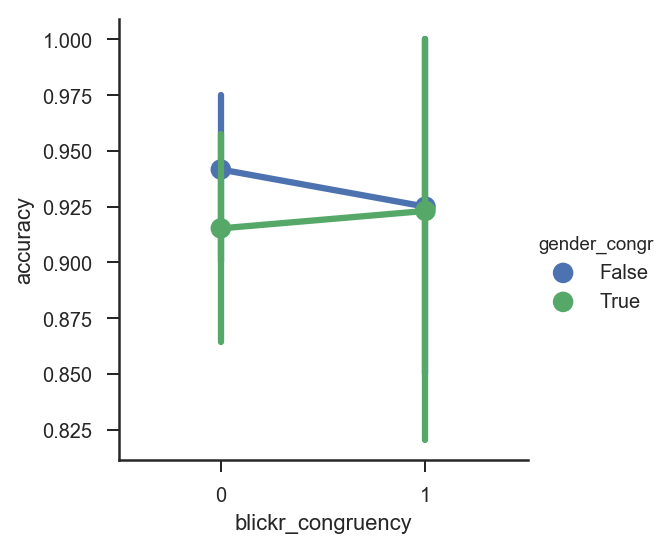

In [25]:
import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="accuracy", hue = "gender_congr", data=df)

Wie in den einzelnen Vergleichsdiagrammen aller Versuchspersonen exemplarisch erkennbar, sind die erkennbaren Tenzenden sehr unterschiedlich. Hier scheint es große interindividuelle Unterschiede zu geben. Versuchsperson 0 (und geringer ausgeprägt auch Versuchsperson 5) beispielsweise zeigen hypothesenkonform schnellere Reaktionen bei vorhandener Geschlechtskongruenz, die sich jedoch im Ergebnis des inferenzstatistischen Tests so nicht wiederspiegeln. 

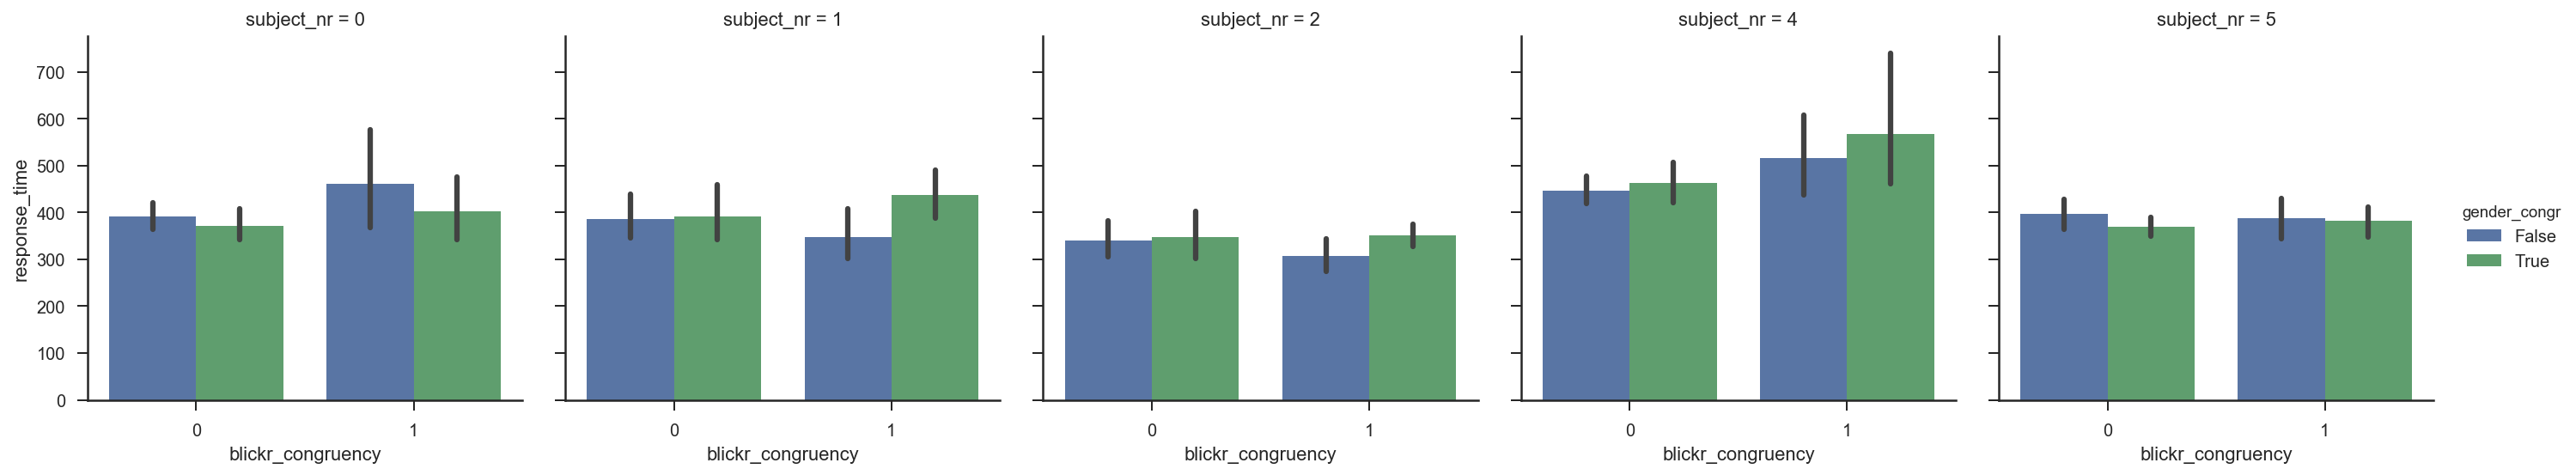

In [26]:
sns.set(style="ticks")
g = sns.factorplot(x="blickr_congruency", y="response_time", hue="gender_congr", col="subject_nr", data=df, kind = "bar")

Dies deutet darauf hin, dass hier außer dem Geschlecht und der Blickrichtung noch weitere Einflussfaktoren mitberücksichtigt werden müssen. In der Zukunft könnte die Untersuchung erweitert werden durch die Nutzung von  Stimulusbildern mit verschiedenen weiblichen und männlichen abgebildeten Personen. Zudem könnten durch eine Erhöhung der Trialanzahl robustere Effekte erreicht werden. Ein Ausschluss eines ersten Übungsblocks ist hier aufgrund der Kürze der Durchführung nicht erfolgt, könnte allerdings zufällige Schwankungen reduzieren.

Abschließend lässt sich bemerken, dass der angestrebte Effekt des "perceptual groupings" nicht erreicht werden konnte sondern der gegenteilige Effekt. Dies eröffnet Möglichkeiten zur weiteren Untersuchung von Wahrnehmungsprozessen und Einflussgrößen darauf.